In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('ratings.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movie_titles = pd.read_csv('movies.csv')

In [5]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df = pd.merge(df,movie_titles, on ='movieId')

In [7]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [10]:
ratings['n_rating']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings['n_rating'].head()

title
'71 (2014)                                 1
'Hellboy': The Seeds of Creation (2004)    1
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Til There Was You (1997)                  2
Name: n_rating, dtype: int64

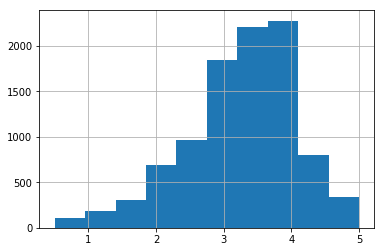

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins = 10)

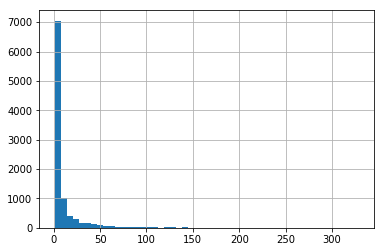

In [12]:
ratings['n_rating'].hist(bins = 50)

C:\Users\sagar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


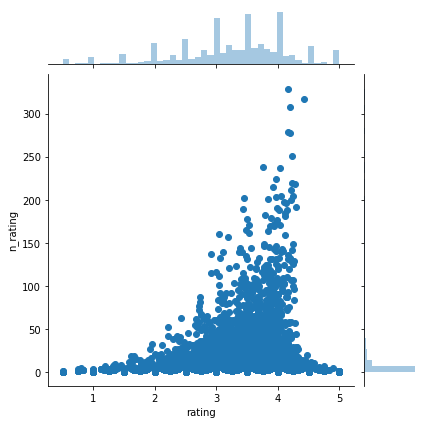

In [13]:
sns.jointplot(x=ratings['rating'], y=ratings['n_rating'], data=ratings)

In [14]:
movie_matrix = df.pivot_table(index='userId', columns = 'title', values = 'rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings.sort_values('n_rating', ascending = False).head(10)

,rating,n_rating
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [16]:
AFO_rating = movie_matrix['Air Force One (1997)']

In [18]:
Contact_rating = movie_matrix['Contact (1997)']

In [19]:
similar_AFO = movie_matrix.corrwith(AFO_rating)

C:\Users\sagar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\sagar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [27]:
similar_AFO = similar_AFO.dropna()
similar_AFO.sort_values(ascending=False)

title
Let It Ride (1989)                                                         1.0
Larry Crowne (2011)                                                        1.0
Battlestar Galactica: Razor (2007)                                         1.0
Be Cool (2005)                                                             1.0
Andre (1994)                                                               1.0
Child's Play 2 (1990)                                                      1.0
Dr. T and the Women (2000)                                                 1.0
Slither (2006)                                                             1.0
Hairspray (2007)                                                           1.0
Guarding Tess (1994)                                                       1.0
Out to Sea (1997)                                                          1.0
Sniper (1993)                                                              1.0
Guard, The (2011)                             

In [60]:
similar_Contact = movie_matrix.corrwith(Contact_rating)

C:\Users\sagar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\sagar\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [63]:
similar_Contact.head(20)

title
'71 (2014)                                          NaN
'Hellboy': The Seeds of Creation (2004)             NaN
'Round Midnight (1986)                              NaN
'Salem's Lot (2004)                                 NaN
'Til There Was You (1997)                           NaN
'Tis the Season for Love (2015)                     NaN
'burbs, The (1989)                             0.486761
'night Mother (1986)                                NaN
(500) Days of Summer (2009)                    0.634064
*batteries not included (1987)                 0.868599
...All the Marbles (1981)                           NaN
...And Justice for All (1979)                  1.000000
00 Schneider - Jagd auf Nihil Baxter (1994)         NaN
1-900 (06) (1994)                                   NaN
10 (1979)                                           NaN
10 Cent Pistol (2015)                               NaN
10 Cloverfield Lane (2016)                          NaN
10 Items or Less (2006)                   